In [3]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [4]:
##importing data sets

appdata=pd.read_csv("application_data.csv")
appdata.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
## importing previous application data set

prevdata=pd.read_csv("previous_application.csv")
prevdata.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
## Getting shapes of both data sets

print(appdata.shape)
print(prevdata.shape)



(307511, 122)
(1670214, 37)


In [7]:
# Lets analyse application data set first
# Finding out columns with null values greater than 50% 

colswithmorethan50=[]
for i in appdata.columns:
    if ((appdata["{}".format(i)].isnull().sum()/len(appdata)*100)>50):
        colswithmorethan50.append(i)

In [8]:
print(colswithmorethan50)

['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE']


In [9]:
len(colswithmorethan50)

41

In [10]:
##Dropping the above columns 
appdata_new=appdata.drop(colswithmorethan50,axis=1)

In [11]:
appdata_new.shape

(307511, 81)

In [12]:
##checking again

colswithmorethan50new=[]
for i in appdata_new.columns:
    if ((appdata_new["{}".format(i)].isnull().sum()/len(appdata_new)*100)>50):
        colswithmorethan50new.append(i)
print(colswithmorethan50new)

[]


Now we have columns which contains null values below 50%
We now have 81 columns out of which we will find out the needed columns only.


In [13]:
appdata_new_frame=appdata_new[["SK_ID_CURR", "TARGET", "NAME_CONTRACT_TYPE" , "CODE_GENDER",
  "FLAG_OWN_CAR" , "FLAG_OWN_REALTY" , "CNT_CHILDREN" , "AMT_INCOME_TOTAL" ,
  "AMT_CREDIT" ,"AMT_ANNUITY" , "AMT_GOODS_PRICE" ,"NAME_TYPE_SUITE","NAME_INCOME_TYPE" ,
  "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS" ,"DAYS_BIRTH","DAYS_EMPLOYED", "NAME_HOUSING_TYPE" ,
  "FLAG_MOBIL" ,"FLAG_EMAIL" ,"OCCUPATION_TYPE" ,"HOUR_APPR_PROCESS_START","REG_REGION_NOT_LIVE_REGION","DEF_30_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE",
  "AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_YEAR"]]

In [14]:
appdata_new_frame.shape

(307511, 28)

In [15]:
## counting null values percentage again

appdata_new_frame.isnull().sum()/len(appdata_new_frame)*100



SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
NAME_HOUSING_TYPE              0.000000
FLAG_MOBIL                     0.000000
FLAG_EMAIL                     0.000000
OCCUPATION_TYPE               31.345545
HOUR_APPR_PROCESS_START        0.000000
REG_REGION_NOT_LIVE_REGION     0.000000
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021


In [16]:
appdata_new_frame.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                      12
AMT_GOODS_PRICE                 278
NAME_TYPE_SUITE                1292
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
NAME_HOUSING_TYPE                 0
FLAG_MOBIL                        0
FLAG_EMAIL                        0
OCCUPATION_TYPE               96391
HOUR_APPR_PROCESS_START           0
REG_REGION_NOT_LIVE_REGION        0
DEF_30_CNT_SOCIAL_CIRCLE       1021
DEF_60_CNT_SOCIAL_CIRCLE       1021
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_YEAR  

In [17]:
## Getting info on numerical columns present in the new dataframe

appdata_new_frame.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_EMAIL,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,306490.000000,306490.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,-16036.995067,63815.045904,0.999997,0.056720,12.063419,0.015144,0.143421,0.100049,0.007000,0.267395,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,4363.988632,141275.766519,0.001803,0.231307,3.265832,0.122126,0.446698,0.362291,0.110757,0.916002,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,-25229.000000,-17912.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,-19682.000000,-2760.000000,1.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,-15750.000000,-1213.000000,1.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,-12413.000000,-289.000000,1.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,-7489.000000,365243.000000,1.000000,1.000000,23.000000,1.000000,34.000000,24.000000,9.000000,27.000000,25.000000


From the above we can see that we have combination of both continuous and categorical variables.
And some of the variables have negative values

In [18]:
appdata_new_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307511 non-null  int64  
 1   TARGET                      307511 non-null  int64  
 2   NAME_CONTRACT_TYPE          307511 non-null  object 
 3   CODE_GENDER                 307511 non-null  object 
 4   FLAG_OWN_CAR                307511 non-null  object 
 5   FLAG_OWN_REALTY             307511 non-null  object 
 6   CNT_CHILDREN                307511 non-null  int64  
 7   AMT_INCOME_TOTAL            307511 non-null  float64
 8   AMT_CREDIT                  307511 non-null  float64
 9   AMT_ANNUITY                 307499 non-null  float64
 10  AMT_GOODS_PRICE             307233 non-null  float64
 11  NAME_TYPE_SUITE             306219 non-null  object 
 12  NAME_INCOME_TYPE            307511 non-null  object 
 13  NAME_EDUCATION

In [19]:
appdata_new_frame.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_MOBIL,FLAG_EMAIL,OCCUPATION_TYPE,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,1,0,Laborers,10,0,2.0,2.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1,0,Core staff,11,0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,1,0,Laborers,9,0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,1,0,Laborers,17,0,0.0,0.0,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,1,0,Core staff,11,0,0.0,0.0,0.0,0.0,0.0


Data type of variables look proper

Looking through the columns one by one

In [20]:
appdata_new_frame.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                      12
AMT_GOODS_PRICE                 278
NAME_TYPE_SUITE                1292
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
NAME_HOUSING_TYPE                 0
FLAG_MOBIL                        0
FLAG_EMAIL                        0
OCCUPATION_TYPE               96391
HOUR_APPR_PROCESS_START           0
REG_REGION_NOT_LIVE_REGION        0
DEF_30_CNT_SOCIAL_CIRCLE       1021
DEF_60_CNT_SOCIAL_CIRCLE       1021
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_YEAR  

In [21]:
# AMT_ANNUITY has 12 null values

appdata_new_frame["AMT_ANNUITY"].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

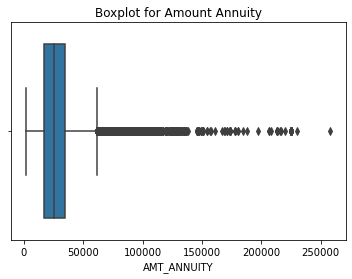

In [22]:
# Lets check the distribution using box plot

sns.boxplot(appdata_new_frame["AMT_ANNUITY"])
plt.title("Boxplot for Amount Annuity")
plt.show()

As we saw above we had 12 null values and the boxplot indicates that there is an outlier. We can impute null values with median here in order to avoid bias due to mean value

In [23]:
##Filling the null values with median value

appdata_new_frame["AMT_ANNUITY"]=appdata_new_frame["AMT_ANNUITY"].fillna(appdata_new_frame["AMT_ANNUITY"].median())

In [24]:
appdata_new_frame["AMT_ANNUITY"].isnull().sum()

0

In [25]:
## AMT_INCOME_TOTAL

print(appdata_new_frame["AMT_INCOME_TOTAL"].isnull().sum())

0


In [26]:
appdata_new_frame["AMT_INCOME_TOTAL"].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

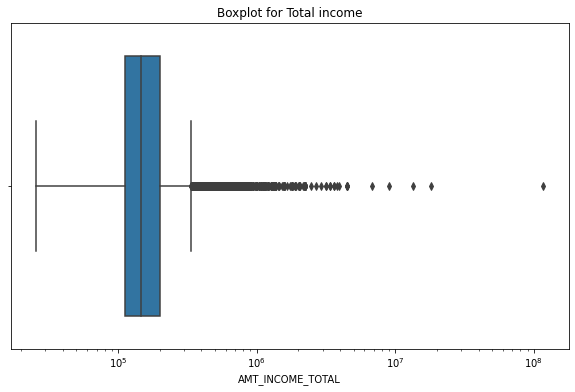

In [27]:
plt.figure(figsize=[10,6])

sns.boxplot(appdata_new_frame["AMT_INCOME_TOTAL"])
plt.xscale("log")
plt.title("Boxplot for Total income")
plt.show()

In [28]:
appdata_new_frame["AMT_INCOME_TOTAL"].quantile([0.5, 0.7, 0.9,0.95,0.99])

0.50    147150.0
0.70    180000.0
0.90    270000.0
0.95    337500.0
0.99    472500.0
Name: AMT_INCOME_TOTAL, dtype: float64

There are outliers in Total income as the income varies for all the customers. We can cap the outliers

In [29]:
# AMT_CREDIT

appdata_new_frame["AMT_CREDIT"].describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

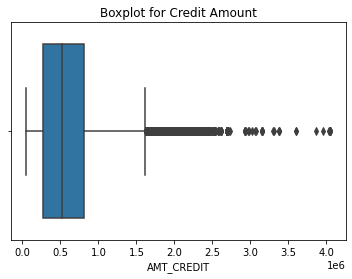

In [30]:
sns.boxplot(appdata_new_frame["AMT_CREDIT"])
plt.title("Boxplot for Credit Amount")
plt.show()

Credit Amount also varies from person to person alsp there is a good number of outliers

In [31]:
## Lets check DAYS_BIRTH and DAYS_EMPLOYED columns
## As we saw earlier , there are some negative values present in these columns

appdata_new_frame["DAYS_BIRTH"]=abs(appdata_new_frame["DAYS_BIRTH"])

In [32]:
appdata_new_frame["DAYS_EMPLOYED"]=abs(appdata_new_frame["DAYS_EMPLOYED"])

In [33]:
appdata_new_frame[["DAYS_BIRTH","DAYS_EMPLOYED"]].describe()

,DAYS_BIRTH,DAYS_EMPLOYED
count,307511.000000,307511.000000
mean,16036.995067,67724.742149
std,4363.988632,139443.751806
min,7489.000000,0.000000
25%,12413.000000,933.000000
50%,15750.000000,2219.000000
75%,19682.000000,5707.000000
max,25229.000000,365243.000000


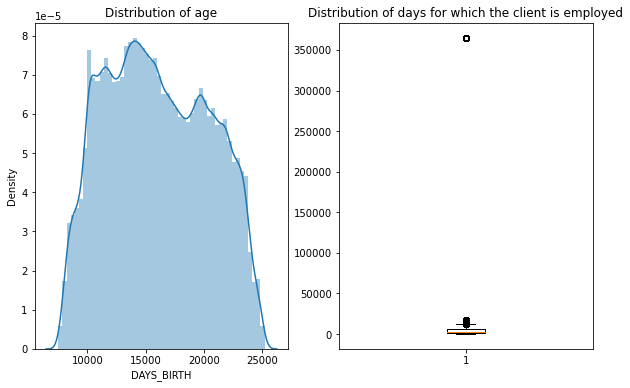

In [34]:
plt.figure(figsize=[10,6])

plt.subplot(1,2,1)
sns.distplot(appdata_new_frame["DAYS_BIRTH"])
plt.title("Distribution of age")

plt.subplot(1,2,2)
plt.boxplot(appdata_new_frame["DAYS_EMPLOYED"])
plt.title("Distribution of days for which the client is employed")
plt.show()

There were no null values for both the columns

1.The age group of the customers are mostly in the same range
2.There is an outlier in the DAYS_EMPLOYED column it is exceptionally high hence this row can be removed

In [35]:
##Checking Target Variable:

appdata_new_frame["TARGET"].value_counts()


0    282686
1     24825
Name: TARGET, dtype: int64

In [36]:
#in percentage 
appdata_new_frame["TARGET"].value_counts(normalize=True)*100


0    91.927118
1     8.072882
Name: TARGET, dtype: float64

91.9% of people are paying the installments on time whereas 8.07% of people are having difficulties.

In [37]:
appdata_new_frame["CODE_GENDER"].value_counts(normalize=True)*100
#print(appdata_new_frame["CODE_GENDER"].isnull().sum())

F      65.834393
M      34.164306
XNA     0.001301
Name: CODE_GENDER, dtype: float64

 As compared to males , females have applied more for the loans 

In [38]:
#Looking at all the available columns to see if we can do analysis on any other columns

print(appdata_new_frame.columns,end="")

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [39]:
#Analysis on NAME_TYPE_SUITE , NAME_EDUCATION_TYPE 
#Lets check for null values first 

appdata_new_frame["NAME_TYPE_SUITE"].isnull().sum()


1292

In [40]:
appdata_new_frame["NAME_EDUCATION_TYPE"].isnull().sum()


0

In [41]:
len(appdata_new_frame)

307511

In [42]:
# Percentage of missing values 
print(appdata_new_frame["NAME_TYPE_SUITE"].isnull().sum() /len(appdata_new_frame)*100)

0.42014757195677555


In [43]:
appdata_new_frame["NAME_TYPE_SUITE"].value_counts(normalize=True)

Unaccompanied      0.811596
Family             0.131112
Spouse, partner    0.037130
Children           0.010669
Other_B            0.005780
Other_A            0.002828
Group of people    0.000885
Name: NAME_TYPE_SUITE, dtype: float64

In [44]:
appdata_new_frame.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                       0
AMT_GOODS_PRICE                 278
NAME_TYPE_SUITE                1292
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
NAME_HOUSING_TYPE                 0
FLAG_MOBIL                        0
FLAG_EMAIL                        0
OCCUPATION_TYPE               96391
HOUR_APPR_PROCESS_START           0
REG_REGION_NOT_LIVE_REGION        0
DEF_30_CNT_SOCIAL_CIRCLE       1021
DEF_60_CNT_SOCIAL_CIRCLE       1021
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_YEAR  

In [45]:
#Filling the null values with mode (this column has been used for further analysis hence imputed the values and also the
#percentage of null value is quite low)

appdata_new_frame["NAME_TYPE_SUITE"]=appdata_new_frame["NAME_TYPE_SUITE"].fillna("Unaccompanied")

In [46]:
#checking again
appdata_new_frame.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                       0
AMT_GOODS_PRICE                 278
NAME_TYPE_SUITE                   0
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
NAME_HOUSING_TYPE                 0
FLAG_MOBIL                        0
FLAG_EMAIL                        0
OCCUPATION_TYPE               96391
HOUR_APPR_PROCESS_START           0
REG_REGION_NOT_LIVE_REGION        0
DEF_30_CNT_SOCIAL_CIRCLE       1021
DEF_60_CNT_SOCIAL_CIRCLE       1021
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_YEAR  

In [47]:
appdata_new_frame.shape

(307511, 28)

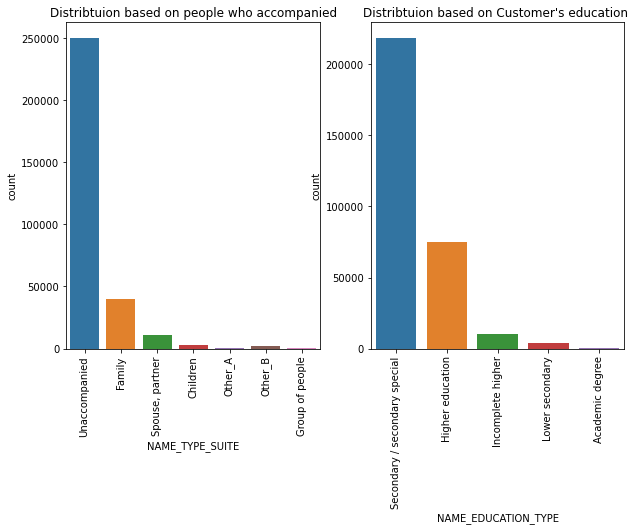

In [48]:
#Plots on NAME_TYPE_SUITE , NAME_EDUCATION_TYPE 

plt.figure(figsize=[10,6])

plt.subplot(1,2,1)
sns.countplot(appdata_new_frame["NAME_TYPE_SUITE"])
plt.xticks(rotation=90)
plt.title("Distribtuion based on people who accompanied")


plt.subplot(1,2,2)
sns.countplot(appdata_new_frame["NAME_EDUCATION_TYPE"])
plt.xticks(rotation=90)
plt.title("Distribtuion based on Customer's education ")
plt.show()


Most of the customers came alone to apply the loan and majority of the loan applcation were submitted by people with Secondary education.

<AxesSubplot:>

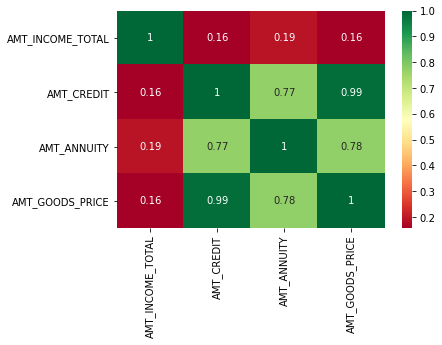

In [49]:
sns.heatmap(appdata_new_frame[["AMT_INCOME_TOTAL","AMT_CREDIT", "AMT_ANNUITY","AMT_GOODS_PRICE"]].corr() , cmap="RdYlGn" ,annot=True)

There is a high correaltion between CREDIT AND GOOD PRICE, we can use either of them

In [50]:
## Binning continuous data

In [51]:
print(appdata_new_frame.columns,end="")

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [52]:
appdata_new_frame["AMT_INCOME_TOTAL"].max()

117000000.0

In [53]:
appdata_new_frame["AMT_INCOME_TOTAL"].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [54]:
# Binning for AMT_INCOME_TOTAL

appdata_new_frame["Income_Range"]=pd.cut(appdata_new_frame["AMT_INCOME_TOTAL"],bins=[0,200000,400000,1000000000] ,labels=["Low","Medium","High"] )

In [55]:
appdata_new_frame["Income_Range"].head(10)

0    Medium
1    Medium
2       Low
3       Low
4       Low
5       Low
6       Low
7    Medium
8       Low
9       Low
Name: Income_Range, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [56]:
appdata_new_frame.shape

(307511, 29)

In [57]:
##Binning AMT_CREDIT

appdata_new_frame["AMT_CREDIT"].describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [58]:
appdata_new_frame["AMT_Credit_Range"]=pd.cut(appdata_new_frame["AMT_CREDIT"],bins=[0,400000,800000,1000000000] ,labels=["Low","Medium","High"] )

In [59]:
appdata_new_frame.shape

(307511, 30)

In [60]:
##Finding age groups

appdata_new_frame["Age_Group"]=pd.cut(appdata_new_frame["DAYS_BIRTH"],bins=[0,7300,10950,14600,18250,21900,25500] ,labels=['0-20','20-30','30-40','40-50','50-60','60-70'] )

##The values are taken by multiplying age groups by 365 and then added 3650

In [61]:
appdata_new_frame.shape

(307511, 31)

In [62]:
appdata_new_frame["Age_Group"]

0         20-30
1         40-50
2         50-60
3         50-60
4         50-60
          ...  
307506    20-30
307507    50-60
307508    40-50
307509    30-40
307510    40-50
Name: Age_Group, Length: 307511, dtype: category
Categories (6, object): ['0-20' < '20-30' < '30-40' < '40-50' < '50-60' < '60-70']

In [63]:
appdata_new_frame.shape

(307511, 31)

In [64]:
# As we know that the target variable has only 2 values 0 and 1 ,lets divide the data frame according to it

df0=appdata_new_frame[appdata_new_frame["TARGET"]==0]

In [65]:
df0.shape

(282686, 31)

In [66]:
df1=appdata_new_frame[appdata_new_frame["TARGET"]==1]

In [67]:
df1.shape

(24825, 31)

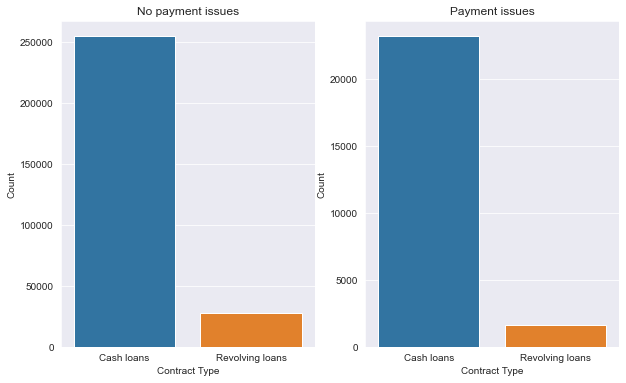

In [68]:
## We now have two different dataframe with the added columns which were binned/bucketed using existing data

#Identifying loans using NAME_CONTRACT_TYPE

plt.figure(figsize=[10,6])

sns.set_style("darkgrid")
plt.subplot(1,2,1)
sns.countplot(df0["NAME_CONTRACT_TYPE"])
plt.xlabel("Contract Type")
plt.ylabel("Count")
plt.title("No payment issues")

plt.subplot(1,2,2)
sns.countplot(df1["NAME_CONTRACT_TYPE"])
plt.xlabel("Contract Type")
plt.ylabel("Count")
plt.title("Payment issues")

plt.show()



In [69]:
df0["NAME_CONTRACT_TYPE"].value_counts()/len(df0)*100

Cash loans         90.209986
Revolving loans     9.790014
Name: NAME_CONTRACT_TYPE, dtype: float64

In [70]:
df1["NAME_CONTRACT_TYPE"].value_counts()/len(df1)*100

Cash loans         93.538771
Revolving loans     6.461229
Name: NAME_CONTRACT_TYPE, dtype: float64

There is not such inference which can be made just looking at counts of type of loans

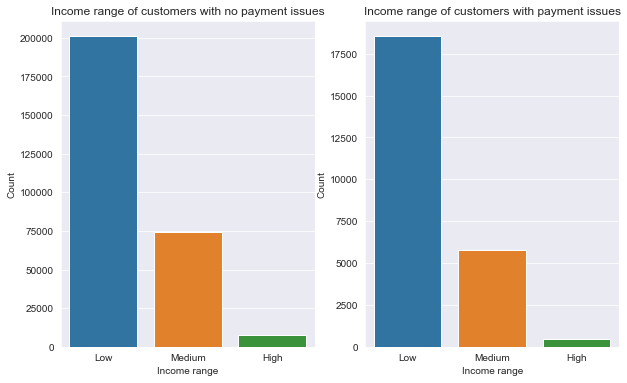

In [71]:
#Using own AMT_INCOME_TOTAL


plt.figure(figsize=[10,6])

sns.set_style("darkgrid")
plt.subplot(1,2,1)
sns.countplot(df0["Income_Range"])
plt.xlabel("Income range")
plt.ylabel("Count")
plt.title("Income range of customers with no payment issues")

plt.subplot(1,2,2)
sns.countplot(df1["Income_Range"])
plt.xlabel("Income range")
plt.ylabel("Count")
plt.title("Income range of customers with payment issues")

plt.show()

Most of the loan applicants have low to medium range incomes 

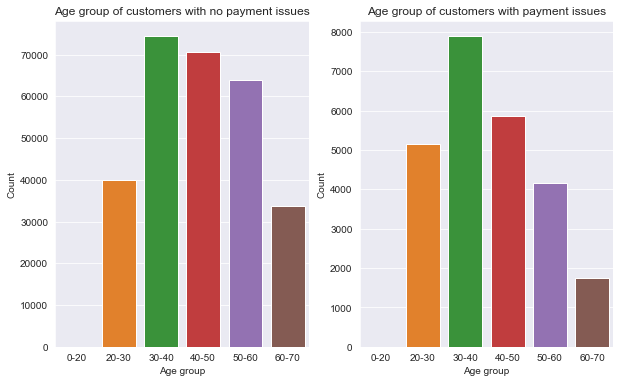

In [72]:
#Using own Age_Group

plt.figure(figsize=[10,6])

sns.set_style("darkgrid")
plt.subplot(1,2,1)
sns.countplot(df0["Age_Group"])
plt.xlabel("Age group")
plt.ylabel("Count")
plt.title("Age group of customers with no payment issues")

plt.subplot(1,2,2)
sns.countplot(df1["Age_Group"])
plt.xlabel("Age group")
plt.ylabel("Count")
plt.title("Age group of customers with payment issues")

plt.show()



Loans should be given to customers in the age group of 30-60, but mostly in age group of 30-50

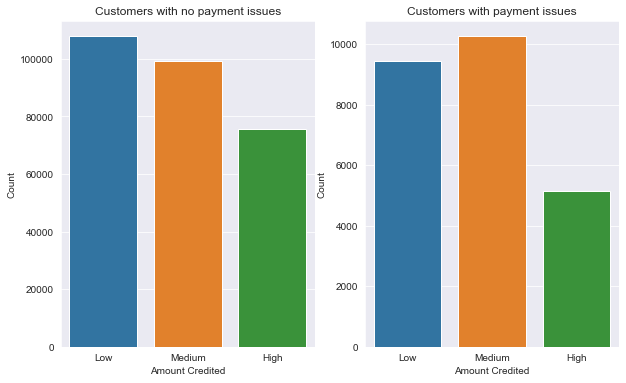

In [73]:
#Lets analyse amount credited column as it is an important metric

plt.figure(figsize=[10,6])

sns.set_style("darkgrid")
plt.subplot(1,2,1)
sns.countplot(df0["AMT_Credit_Range"])
plt.xlabel("Amount Credited")
plt.ylabel("Count")
plt.title("Customers with no payment issues")

plt.subplot(1,2,2)
sns.countplot(df1["AMT_Credit_Range"])
plt.xlabel("Amount Credited")
plt.ylabel("Count")
plt.title("Customers with payment issues")

plt.show()

It can be seen that customers with less credit are more likely to make payment .Also, after low credit ,
medium credit amount loans can be considered

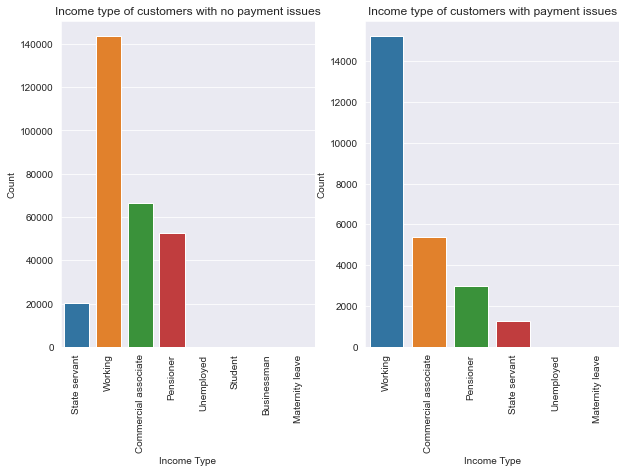

In [74]:
##Based on Income_Type i.e NAME_INCOME_TYPE

plt.figure(figsize=[10,6])

sns.set_style("darkgrid")
plt.subplot(1,2,1)
sns.countplot(df0["NAME_INCOME_TYPE"])
plt.xlabel("Income Type")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.title("Income type of customers with no payment issues")

plt.subplot(1,2,2)
sns.countplot(df1["NAME_INCOME_TYPE"])
plt.xlabel("Income Type")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.title("Income type of customers with payment issues")

plt.show()

As we can see the count of customers who are working professionals are more likely to repay the loan.
Also , customers working as State Servants, Commerical Associate's and Pensioner's can be considered.


In [75]:
df0["OCCUPATION_TYPE"].isnull().sum()

90113

In [76]:
print(appdata_new_frame.columns,end="")

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'Income_Range', 'AMT_Credit_Range', 'Age_Group'],
      dtype='object')

In [77]:
appdata_new_frame["NAME_HOUSING_TYPE"].isnull().sum()

0

In [78]:
appdata_new_frame.shape

(307511, 31)

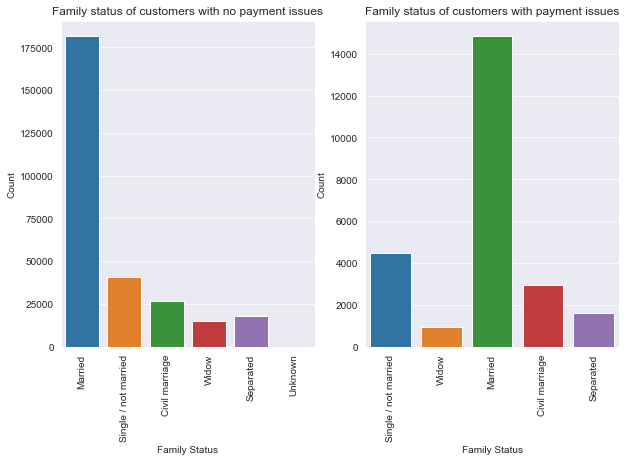

In [79]:
##Based on NAME_FAMILY_STATUS ,CODE_GENDER , NAME_HOUSING_TYPE

plt.figure(figsize=[10,6])

sns.set_style("darkgrid")
plt.subplot(1,2,1)
sns.countplot(df0["NAME_FAMILY_STATUS"])
plt.xlabel("Family Status")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.title("Family status of customers with no payment issues")

plt.subplot(1,2,2)
sns.countplot(df1["NAME_FAMILY_STATUS"])
plt.xlabel("Family Status")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.title("Family status of customers with payment issues")


plt.show()

Married people have paid the loans on time as compared to other sub categories

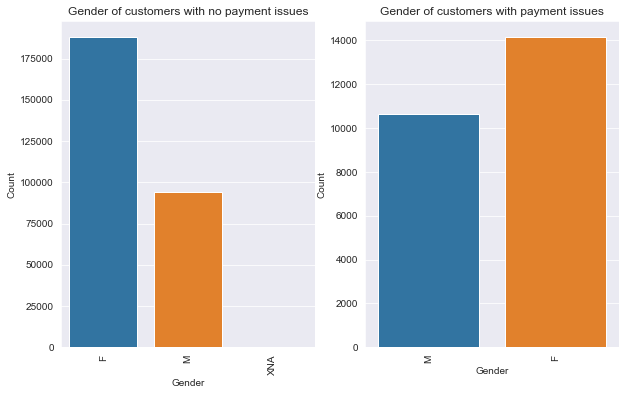

In [80]:
plt.figure(figsize=[10,6])


plt.subplot(1,2,1)
sns.countplot(df0["CODE_GENDER"])
plt.xlabel("Gender")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.title("Gender of customers with no payment issues")

plt.subplot(1,2,2)
sns.countplot(df1["CODE_GENDER"])
plt.xlabel("Gender")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.title("Gender of customers with payment issues")
plt.show()

Banks can target more female customers than male customers

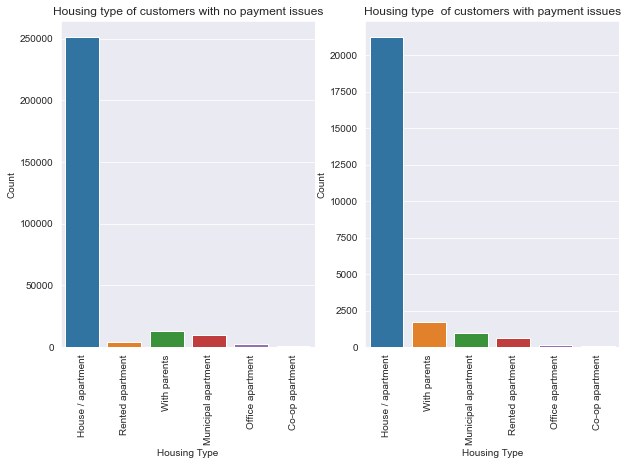

In [81]:
# NAME_HOUSING_TYPE


plt.figure(figsize=[10,6])

sns.set_style("darkgrid")
plt.subplot(1,2,1)
sns.countplot(df0["NAME_HOUSING_TYPE"])
plt.xlabel("Housing Type")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.title("Housing type of customers with no payment issues")

plt.subplot(1,2,2)
sns.countplot(df1["NAME_HOUSING_TYPE"])
plt.xlabel("Housing Type")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.title("Housing type  of customers with payment issues")


plt.show()

It can be seen that people with own houses can be targeted and also a small fraction of loan can be given to people 
living with their parents as there are chances that the parents already have their own house

In [82]:
#Bivariate Analysis

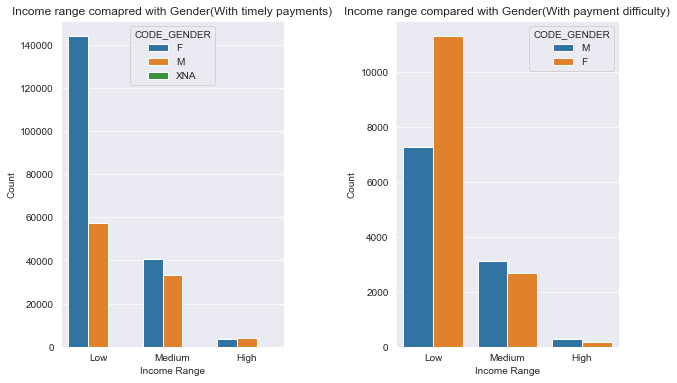

In [83]:
# Comparing income range and Gender

plt.figure(figsize=[10,6])
plt.subplots_adjust(wspace=0.5)
sns.set_style("darkgrid")
plt.subplot(1,2,1)
sns.countplot(x=df0["Income_Range"],hue=df0["CODE_GENDER"])
plt.xlabel("Income Range")
plt.ylabel("Count")
plt.title("Income range comapred with Gender(With timely payments)")

plt.subplot(1,2,2)
sns.countplot(x=df1["Income_Range"],hue=df1["CODE_GENDER"])
plt.xlabel("Income Range")
plt.ylabel("Count")
plt.title("Income range compared with Gender(With payment difficulty)")

plt.show()

Females with low income are likely to make timely payments and can be targetted.

In [84]:
## Income vs Credit

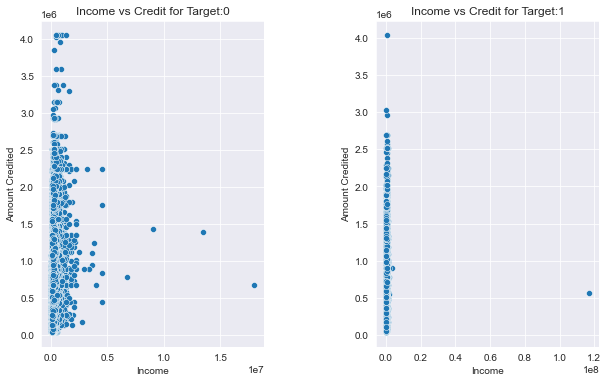

In [85]:
plt.figure(figsize=[10,6])
plt.subplots_adjust(wspace=0.5)
sns.set_style("darkgrid")
plt.subplot(1,2,1)
sns.scatterplot(x=df0["AMT_INCOME_TOTAL"],y=df0["AMT_CREDIT"])
plt.xlabel("Income")
plt.ylabel("Amount Credited")
plt.title("Income vs Credit for Target:0")

plt.subplot(1,2,2)
sns.scatterplot(x=df1["AMT_INCOME_TOTAL"],y=df1["AMT_CREDIT"])
plt.xlabel("Income")
plt.ylabel("Amount Credited")
plt.title("Income vs Credit for Target:1")
plt.show()

people with more income apply for more amount of credit and do not have payment issues as compared with people having low income

In [86]:
appdata_new_frame[["AMT_INCOME_TOTAL","AMT_CREDIT"]].corr()

,AMT_INCOME_TOTAL,AMT_CREDIT
AMT_INCOME_TOTAL,1.00000,0.15687
AMT_CREDIT,0.15687,1.00000


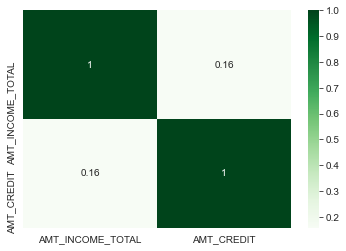

In [87]:
sns.heatmap(appdata_new_frame[["AMT_INCOME_TOTAL","AMT_CREDIT"]].corr(), cmap="Greens" , annot=True)
plt.show()

 There is not much of correlation between these two variables

In [88]:
##NAME_FAMILY_STATUS and NAME_EDUCATION_TYPE 

In [89]:
appdata_new_frame[["NAME_FAMILY_STATUS","NAME_EDUCATION_TYPE"]]

,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE
0,Single / not married,Secondary / secondary special
1,Married,Higher education
2,Single / not married,Secondary / secondary special
3,Civil marriage,Secondary / secondary special
4,Single / not married,Secondary / secondary special
...,...,...
307506,Separated,Secondary / secondary special
307507,Widow,Secondary / secondary special
307508,Separated,Higher education
307509,Married,Secondary / secondary special


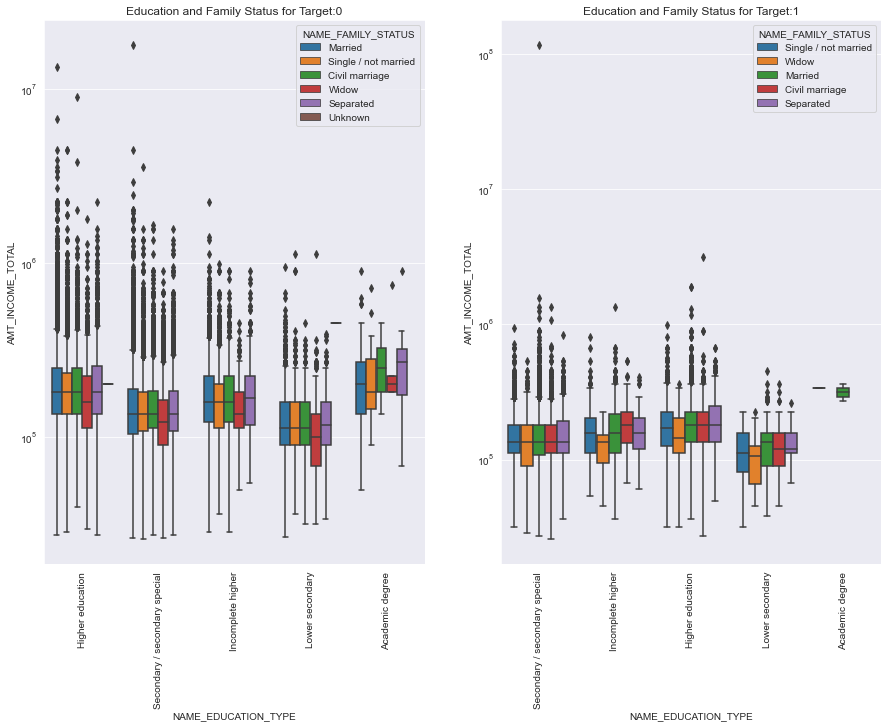

In [90]:
plt.figure(figsize=[15,10])

plt.subplot(1,2,1)
plt.yscale("log")
sns.boxplot(x=df0["NAME_EDUCATION_TYPE"], y=df0["AMT_INCOME_TOTAL"] ,hue=df0["NAME_FAMILY_STATUS"])
plt.title("Education and Family Status for Target:0")
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.yscale("log")
sns.boxplot(x=df1["NAME_EDUCATION_TYPE"], y=df1["AMT_INCOME_TOTAL"] ,hue=df1["NAME_FAMILY_STATUS"])
plt.title("Education and Family Status for Target:1")
plt.xticks(rotation=90)

plt.show()

1.People with higher education are most likely to make payments and in that married people can be moslty targeted

In [91]:
##Correlation

<AxesSubplot:>

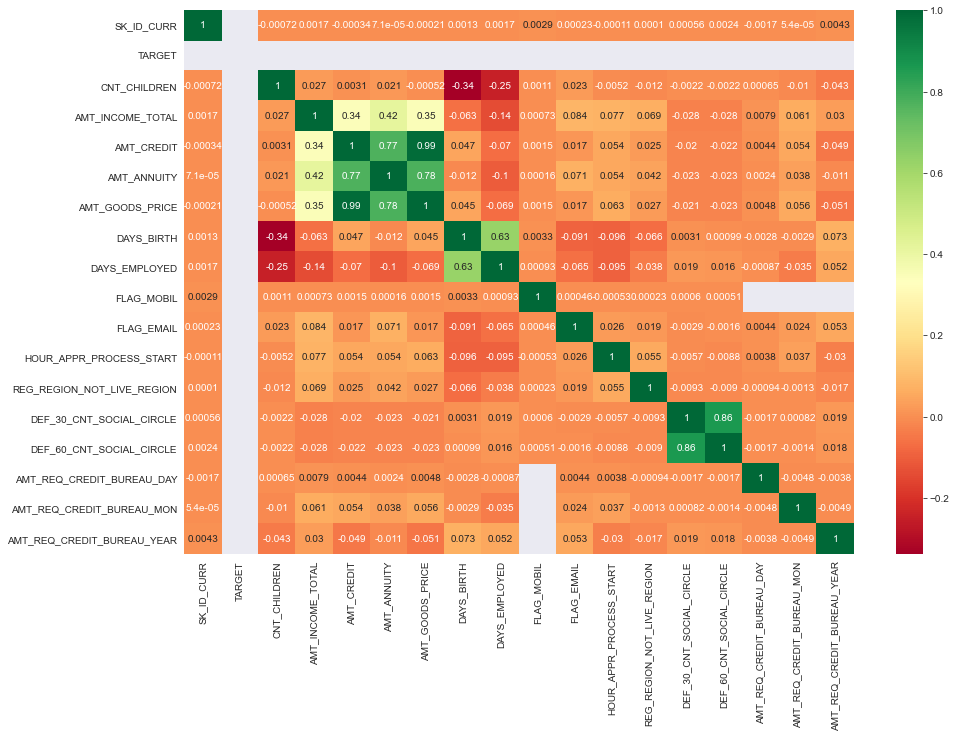

In [92]:
plt.figure(figsize=[15,10])
sns.heatmap(df0.corr() , cmap="RdYlGn" , annot=True)

From the above we can find out following:
1.AMT_CREDIT AND AMT_GOODS_PRICE are highly correlated
2.DEF_30_CNT_SOCIAL_CIRCLE and DEF_60_CNT_SOCIAL_CIRCLE have strong correlation.

<AxesSubplot:>

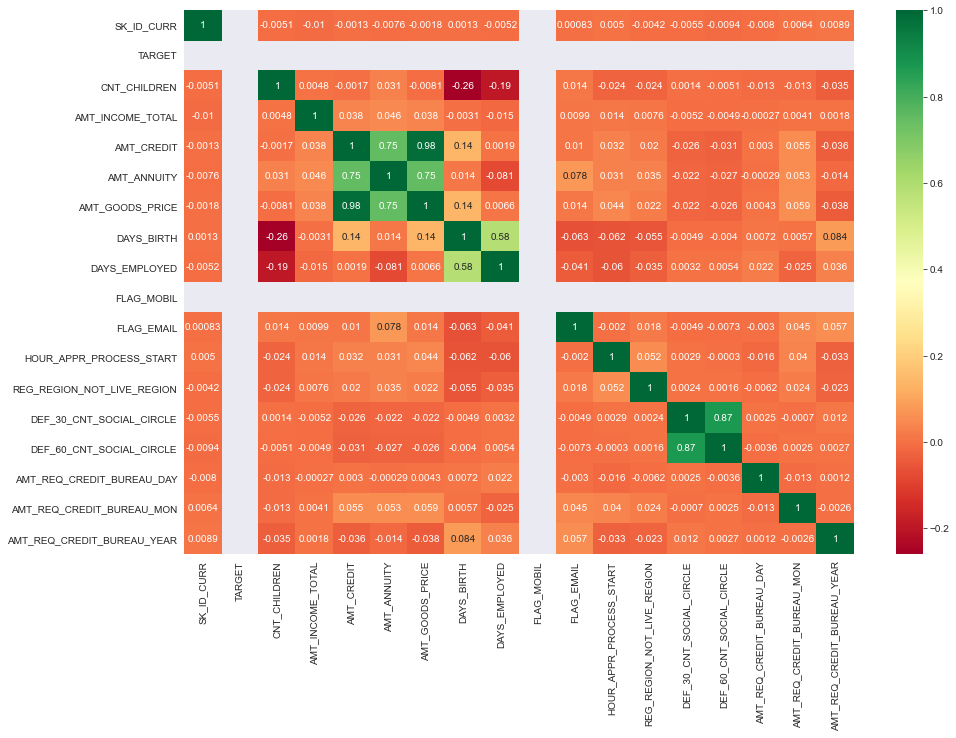

In [94]:
plt.figure(figsize=[15,10])
sns.heatmap(df1.corr() , cmap="RdYlGn" , annot=True)

Same observations can be seen here

In [95]:
#Saving 
appdata_new_frame.to_csv("FramedDataSetlatest.csv")

# Previous_application dataset analysis

In [96]:
# Analysing Previous data datset

prevdata=pd.read_csv("previous_application.csv")
prevdata.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
# Performing General checks

prevdata.shape

(1670214, 37)

In [98]:
prevdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

SK_ID_CURR is common columns in both the application and previous application dataset

In [99]:
# Describing Numeric columns

prevdata.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


There are some columns with negative values

In [100]:
## Finding null values per column in percentage

prevdata.isnull().sum()/len(prevdata)*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [101]:
## Findinf columns with more than 50% null values

ColumnsWithMoreThan50NullValues=[]

for i in prevdata.columns:
    if (prevdata["{}".format(i)].isnull().sum()/len(prevdata)*100)>50:
        ColumnsWithMoreThan50NullValues.append(i)
        

In [102]:
ColumnsWithMoreThan50NullValues

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED']

In [103]:
#Dropping the above columns 

prevdata.drop(ColumnsWithMoreThan50NullValues,axis=1,inplace=True)

In [104]:
prevdata.shape

(1670214, 33)

In [105]:
## Selecting only the needed columns:

prevdata=prevdata[["SK_ID_PREV","SK_ID_CURR","NAME_CONTRACT_TYPE","AMT_ANNUITY","AMT_APPLICATION",
                 "AMT_CREDIT","AMT_GOODS_PRICE","HOUR_APPR_PROCESS_START","NAME_CASH_LOAN_PURPOSE",
                  "NAME_CONTRACT_STATUS","DAYS_DECISION","NAME_CLIENT_TYPE","NAME_GOODS_CATEGORY","NAME_PORTFOLIO",
                   "NAME_PRODUCT_TYPE","PRODUCT_COMBINATION",]]

In [106]:
prevdata.isnull().sum()/len(prevdata)*100

SK_ID_PREV                  0.000000
SK_ID_CURR                  0.000000
NAME_CONTRACT_TYPE          0.000000
AMT_ANNUITY                22.286665
AMT_APPLICATION             0.000000
AMT_CREDIT                  0.000060
AMT_GOODS_PRICE            23.081773
HOUR_APPR_PROCESS_START     0.000000
NAME_CASH_LOAN_PURPOSE      0.000000
NAME_CONTRACT_STATUS        0.000000
DAYS_DECISION               0.000000
NAME_CLIENT_TYPE            0.000000
NAME_GOODS_CATEGORY         0.000000
NAME_PORTFOLIO              0.000000
NAME_PRODUCT_TYPE           0.000000
PRODUCT_COMBINATION         0.020716
dtype: float64

In [107]:
## Analysing individual columns

prevdata["NAME_CASH_LOAN_PURPOSE"].value_counts(normalize=True)*100

XAP                                 55.242083
XNA                                 40.588691
Repairs                              1.422872
Other                                0.934491
Urgent needs                         0.503648
Buying a used car                    0.172912
Building a house or an annex         0.161237
Everyday expenses                    0.144652
Medicine                             0.130163
Payments on other loans              0.115614
Education                            0.094180
Journey                              0.074182
Purchase of electronic equipment     0.063525
Buying a new car                     0.060591
Wedding / gift / holiday             0.057597
Buying a home                        0.051790
Car repairs                          0.047718
Furniture                            0.044845
Buying a holiday home / land         0.031912
Business development                 0.025506
Gasification / water supply          0.017962
Buying a garage                   

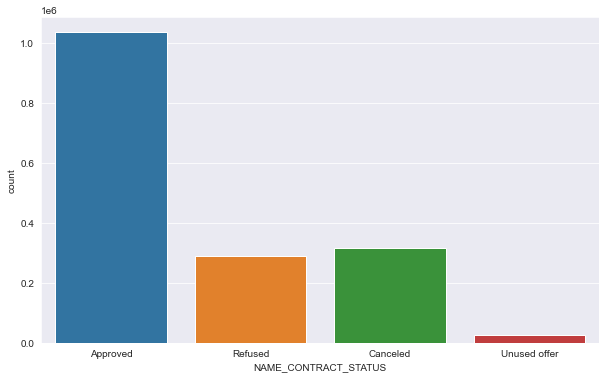

In [108]:
##Analysing the status 

plt.figure(figsize=[10,6])

sns.countplot(prevdata["NAME_CONTRACT_STATUS"])
plt.show()

Majority of the loans were approved 

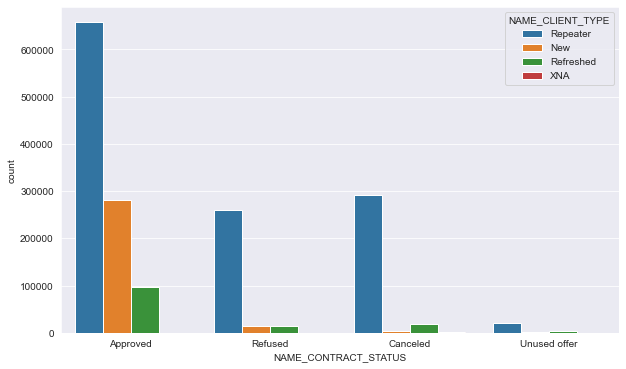

In [109]:


plt.figure(figsize=[10,6])

sns.countplot(x=prevdata["NAME_CONTRACT_STATUS"],hue=prevdata["NAME_CLIENT_TYPE"])
plt.show()

Clients who had applied for loan and also the who applied for new loans got approved loans

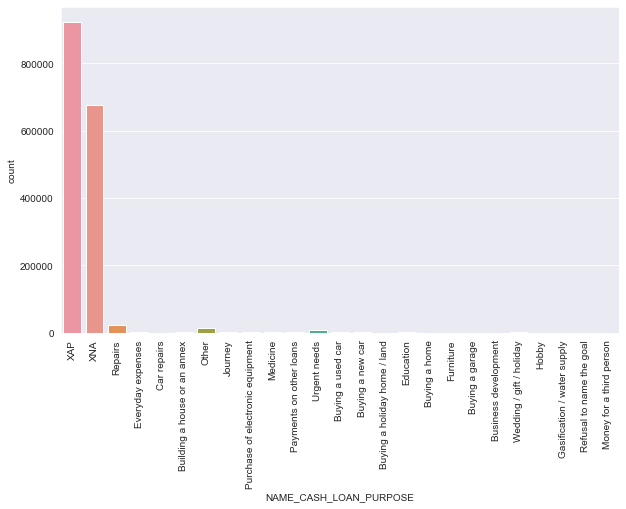

In [110]:
##Analysing NAME_CASH_LOAN_PURPOSE

plt.figure(figsize=[10,6])

sns.countplot(prevdata["NAME_CASH_LOAN_PURPOSE"])
plt.xticks(rotation=90)
plt.show()

In [111]:
##lets ignore XAP AND XNA

a=prevdata[(prevdata["NAME_CASH_LOAN_PURPOSE"]=="XAP") | (prevdata["NAME_CASH_LOAN_PURPOSE"]=="XNA")].index

In [112]:
len(a)

1600579

In [113]:
forplot=prevdata.drop(a,axis=0)

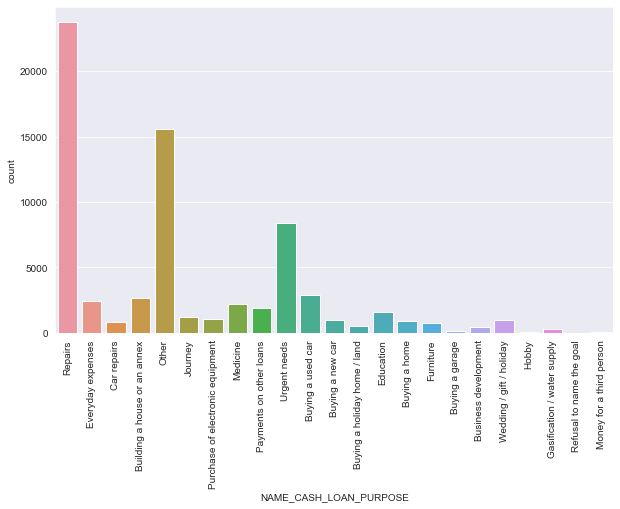

In [114]:
plt.figure(figsize=[10,6])

sns.countplot(forplot["NAME_CASH_LOAN_PURPOSE"])
plt.xticks(rotation=90)
plt.show()

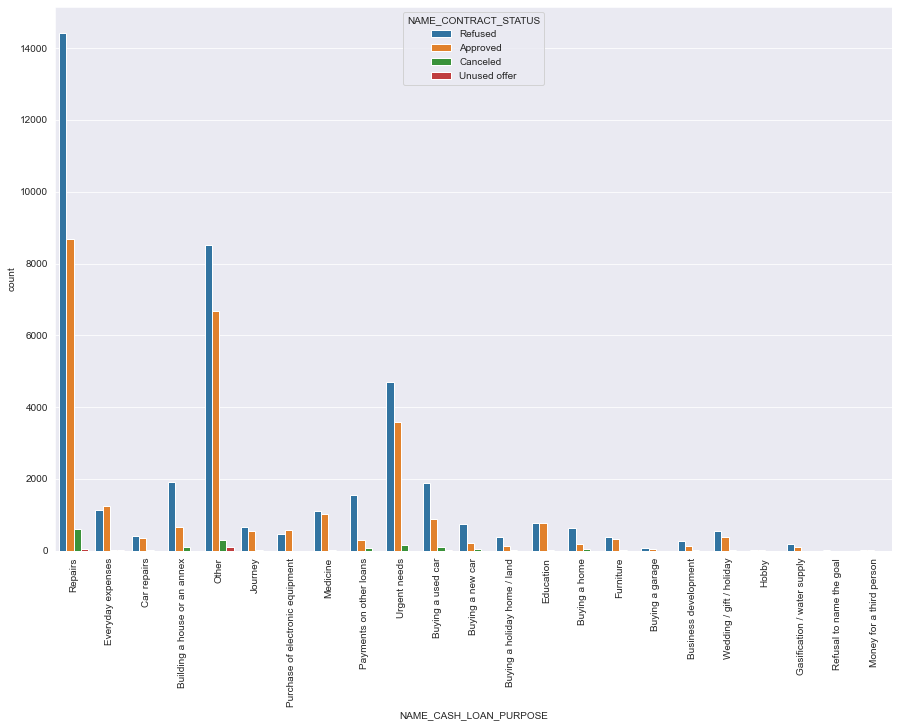

In [115]:
#Anlaysing CASH LOAN PURPOSE AND STATUS , to see which were the loans approved

plt.figure(figsize=[15,10])

sns.countplot(x=forplot["NAME_CASH_LOAN_PURPOSE"],hue=forplot["NAME_CONTRACT_STATUS"])
plt.xticks(rotation=90)
plt.show()

1.Loans for repair were refused the highest
2.Education loans have equal approvals and rejections 

In [116]:
forplot.shape

(69635, 16)

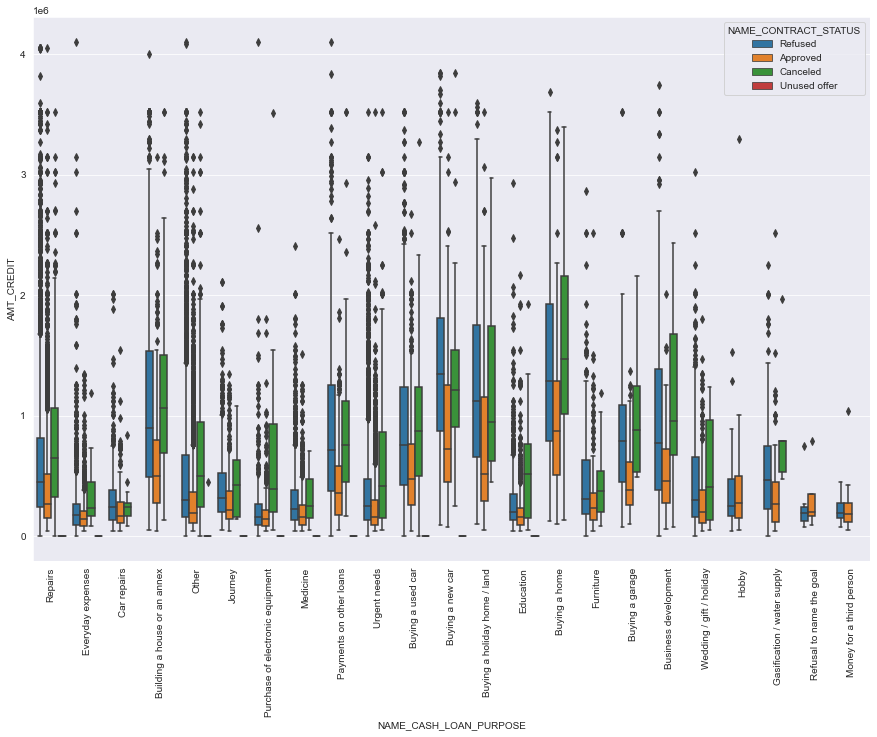

In [117]:
plt.figure(figsize=[15,10])

sns.boxplot(x=forplot["NAME_CASH_LOAN_PURPOSE"],y=forplot["AMT_CREDIT"],hue=forplot["NAME_CONTRACT_STATUS"])
plt.xticks(rotation=90)
plt.show()

Buying a new car /Land /Home have highest approval rated and equally ranging credit amount

In [118]:
## Merging both application data set and previous application dataset


appdataset=pd.read_csv("FramedDataSetlatest.csv") 
appdataset.drop("Unnamed: 0",axis=1,inplace=True)

In [119]:
appdataset.shape

(307511, 31)

In [120]:
prevdata.shape

(1670214, 16)

In [121]:
merged=pd.merge(appdataset,prevdata,how="inner",on="SK_ID_CURR",suffixes="_p")

suffix p will be used for columns in previous_application dataset and _ will be used for the columns in application dataset

In [122]:
merged.shape

(1413701, 46)

In [123]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 46 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   SK_ID_CURR                  1413701 non-null  int64  
 1   TARGET                      1413701 non-null  int64  
 2   NAME_CONTRACT_TYPE_         1413701 non-null  object 
 3   CODE_GENDER                 1413701 non-null  object 
 4   FLAG_OWN_CAR                1413701 non-null  object 
 5   FLAG_OWN_REALTY             1413701 non-null  object 
 6   CNT_CHILDREN                1413701 non-null  int64  
 7   AMT_INCOME_TOTAL            1413701 non-null  float64
 8   AMT_CREDIT_                 1413701 non-null  float64
 9   AMT_ANNUITY_                1413701 non-null  float64
 10  AMT_GOODS_PRICE_            1412493 non-null  float64
 11  NAME_TYPE_SUITE             1413701 non-null  object 
 12  NAME_INCOME_TYPE            1413701 non-null  object 
 1

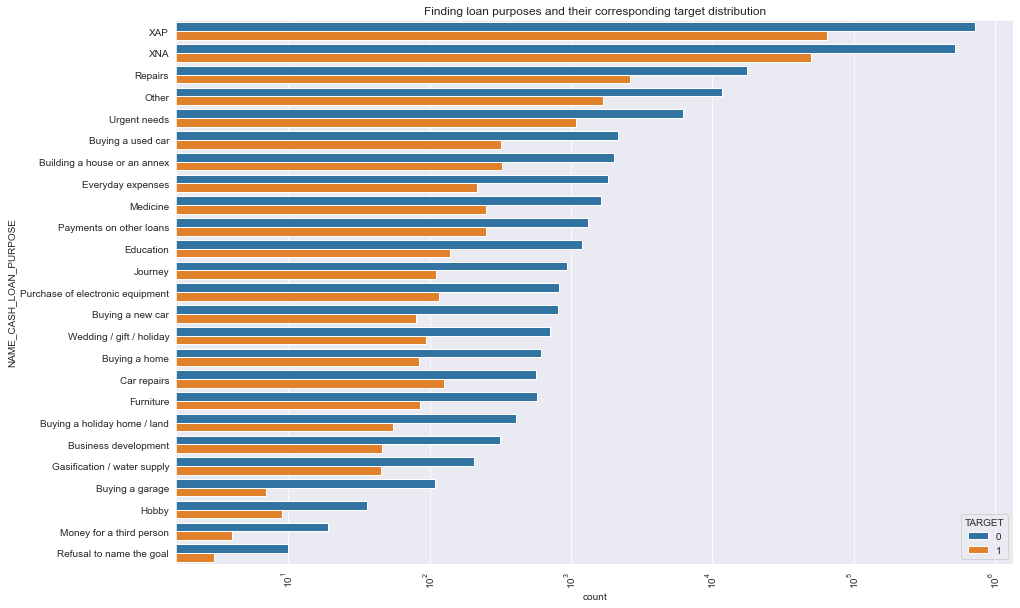

In [124]:
plt.figure(figsize=[15,10])
plt.xscale("log")
sns.countplot(y=merged["NAME_CASH_LOAN_PURPOSE"],hue=merged["TARGET"] ,order=merged["NAME_CASH_LOAN_PURPOSE"].value_counts().index)
plt.title("Finding loan purposes and their corresponding target distribution")
plt.xticks(rotation=90)
plt.show()

In [125]:
##Removing the XAP and XNA variables 

c=merged[(merged["NAME_CASH_LOAN_PURPOSE"]=="XAP") | (merged["NAME_CASH_LOAN_PURPOSE"]=="XNA")].index
MergedForPlot=merged.drop(c,axis=0)

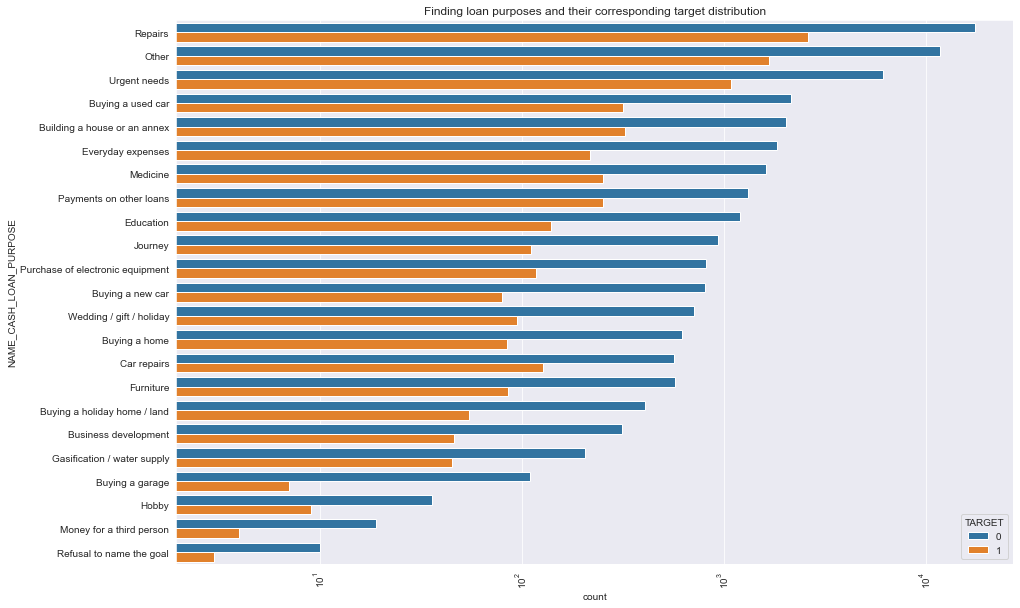

In [126]:
plt.figure(figsize=[15,10])
plt.xscale("log")
sns.countplot(y=MergedForPlot["NAME_CASH_LOAN_PURPOSE"],hue=MergedForPlot["TARGET"] ,order=MergedForPlot["NAME_CASH_LOAN_PURPOSE"].value_counts().index)
plt.title("Finding loan purposes and their corresponding target distribution")
plt.xticks(rotation=90)
plt.show()

1.We can see that people who taken loan for repairs are facing difficulties.
2.Loans should be given for Buying land/home , business development ,buying car.

In [128]:
#credit vs purpose

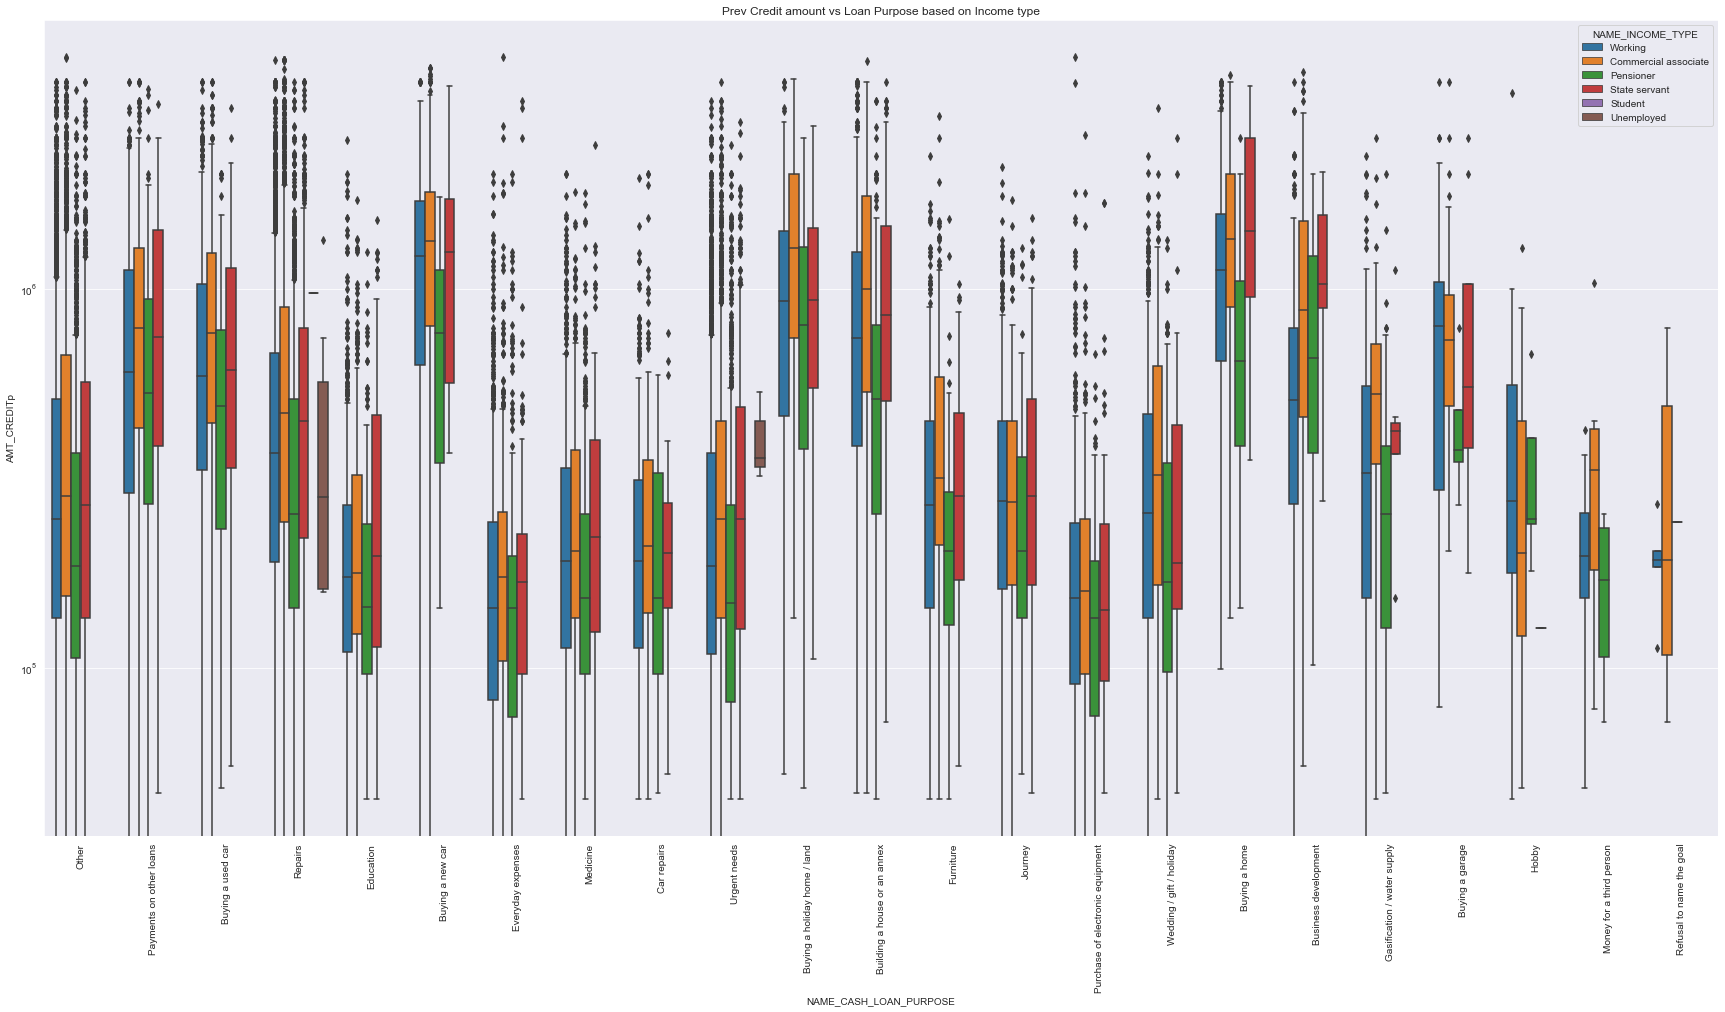

In [129]:
plt.figure(figsize=(30,15))

plt.yscale('log')

sns.boxplot(data=MergedForPlot, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_INCOME_TYPE',y='AMT_CREDITp')
plt.title('Prev Credit amount vs Loan Purpose based on Income type')
plt.xticks(rotation=90)
plt.show()

It can be seen that majority of people from all income types excluding student and unemployed are looking for buying a car, 
buying a land,Building a house ,Buying a home and the amount credited is also high .
Commercial associates did apply for a loan but didnt state the purpose and credit range is also at lower side for them

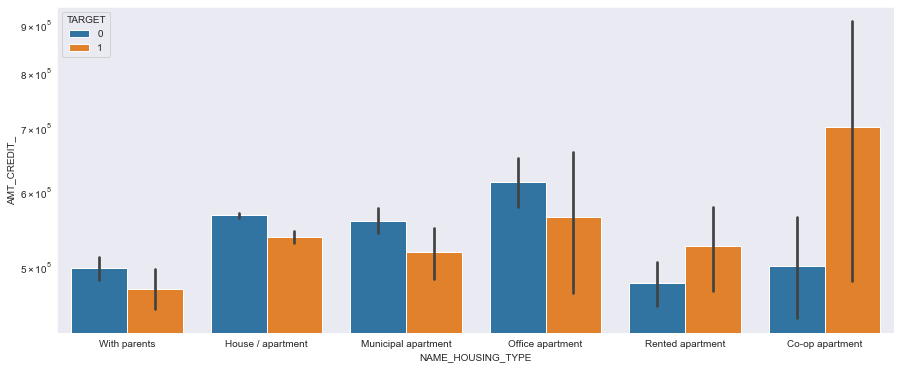

In [130]:
##Housing type and target (application data)

plt.figure(figsize=[15,6])
plt.yscale("log")
sns.barplot(y=MergedForPlot['AMT_CREDIT_'],x=MergedForPlot["NAME_HOUSING_TYPE"],hue=MergedForPlot["TARGET"])
plt.show()

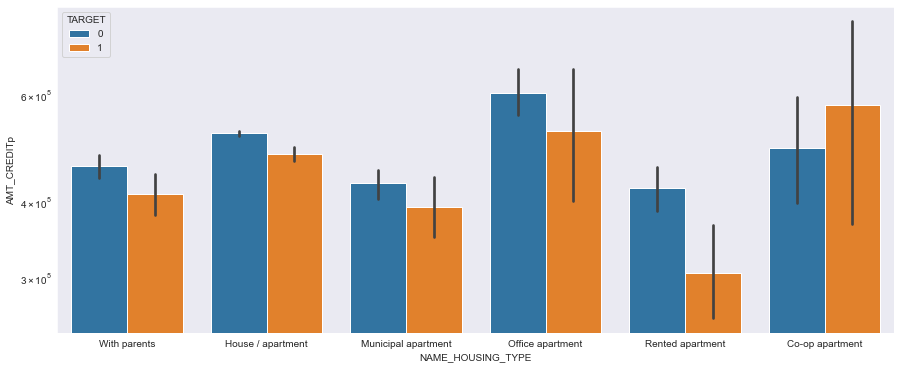

In [131]:
##Housing type and target (prev data)

plt.figure(figsize=[15,6])
plt.yscale("log")
sns.barplot(y=MergedForPlot['AMT_CREDITp'],x=MergedForPlot["NAME_HOUSING_TYPE"],hue=MergedForPlot["TARGET"])
plt.show()

Both the data in AMT credit columns present in Application data set and previous dataset suggest that , customers
living with parents ,living in Office apratment should be target more and given loans whereas those liveing in Co-op apartments 
shoudl be targeted less as they have payment diificulties.

In [133]:
#Dividing the datset based on the defaulters and non-defaulters
nondefaulters = MergedForPlot[MergedForPlot['TARGET']==0] 
defaulters = MergedForPlot[MergedForPlot['TARGET']==1] 

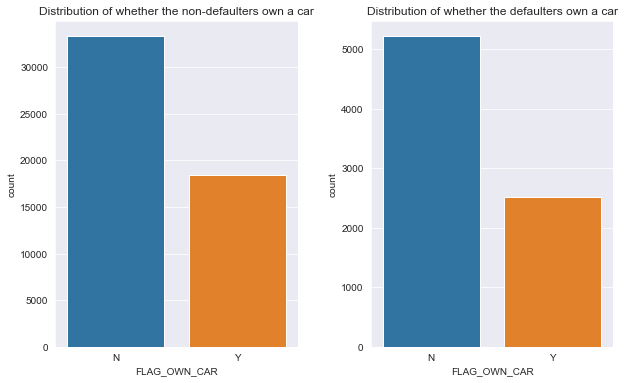

In [134]:
plt.figure(figsize=[10,6])
plt.subplots_adjust(wspace = 0.3)
plt.subplot(1,2,1)
sns.countplot(nondefaulters["FLAG_OWN_CAR"])
plt.title("Distribution of whether the non-defaulters own a car")

plt.subplot(1,2,2)

sns.countplot(defaulters["FLAG_OWN_CAR"])
plt.title("Distribution of whether the defaulters own a car")
plt.show()


Those who do not own a car can be targeted more